In [1]:
import pandas as pd
from pathlib import Path

In [2]:
path = Path('Data/')

In [3]:
df = pd.read_feather('Data/May2015_subset.fthr')

/home/gokul/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [4]:
df.tail(3).T

,6195169,6195170,6195171
created_utc,1433116781,1433116784,1433116785
ups,170,9,37
subreddit_id,t5_2qh13,t5_2qh13,t5_2qh13
link_id,t3_37zl5z,t3_380j06,t3_37z0mw
name,t1_crrbedn,t1_crrbefm,t1_crrbeft
score_hidden,0,0,0
author_flair_css_class,None,None,None
author_flair_text,None,None,None
subreddit,worldnews,worldnews,worldnews
id,crrbedn,crrbefm,crrbeft


# What is t1, t3, and t5 ?
$t_i$ are 
<img src="images/reddit_API.png" alt="Drawing" style="width: 200px;"/>

In [5]:
f"{df.memory_usage(deep=True).sum() / 1023.0**3} GB"

'5.128976683577038 GB'

! Ohh, let's reduce those memory footprint.

In [6]:
df.shape

(6195172, 22)

In [7]:
df['subreddit'] = df.subreddit.astype('category')
df['subreddit_id'] = df.subreddit_id.astype('category')
df['author_flair_css_class'] = df.author_flair_css_class.astype('category')
df['distinguished'] = df.distinguished.astype('category')
df['link_id'] = df.link_id.astype('category')

df.drop(['archived'], axis=1, inplace=True) # Only one value i.e. 0
# df = df[~(df.body == '[deleted]')]  # remove [deleted] comments
df.drop(['retrieved_on'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)

In [8]:
df.shape

(6195172, 19)

In [9]:
df.columns

Index(['created_utc', 'ups', 'subreddit_id', 'link_id', 'name', 'score_hidden',
       'author_flair_css_class', 'author_flair_text', 'subreddit',
       'removal_reason', 'gilded', 'downs', 'author', 'score', 'body',
       'distinguished', 'edited', 'controversiality', 'parent_id'],
      dtype='object')

In [10]:
df.removal_reason.unique()

array([None, 'legal'], dtype=object)

In [11]:
f"{df.memory_usage(deep=True).sum() / 1023.0**3} GB"

'3.2712493806750738 GB'

In [12]:
assert len(df.subreddit_id.unique()) == len(df.subreddit.unique())

In [13]:
# No comments in a subreddits
df.subreddit.value_counts()

leagueoflegends      1223184
funny                 745916
news                  548287
todayilearned         519910
worldnews             490354
movies                376601
gaming                361265
politics              244927
explainlikeimfive     223148
anime                 221118
gameofthrones         191006
motorcycles            89721
science                89413
conspiracy             78349
tf2                    76549
sex                    74912
guns                   61234
comicbooks             60303
pokemon                59730
food                   55231
starcraft              53797
askscience             53017
mylittlepony           44119
space                  42726
skyrim                 40568
circlejerk             30134
facepalm               22562
community              20635
harrypotter            19998
progresspics           13385
drunk                  13027
startrek               12275
thewalkingdead         10357
offbeat                10035
lifehacks     

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
df['time'] = pd.to_datetime(df.created_utc, unit='s') 

In [16]:
np.unique([i[:3] for i in df.name.unique()])

array(['t1_'], dtype='<U3')

In [17]:
np.unique([i[:3] for i in df.parent_id.unique()])

array(['t1_', 't3_'], dtype='<U3')

In [18]:
df_first_comment = df[['link_id', 'time']].groupby(by=['link_id']).min()

In [19]:
df_first_comment.shape

(262519, 1)

In [20]:
df_first_comment.head()

,time
link_id,
t3_11411c,2015-05-31 02:50:41
t3_17f129,2015-05-19 13:53:19
t3_17xepd,2015-05-07 19:51:30
t3_19l2pc,2015-05-11 22:30:10
t3_1aw2dx,2015-05-06 18:52:22


In [21]:
df_first_comment_dict = df_first_comment.to_dict('index')

In [22]:
def time_lapse(x):
    return df_first_comment_dict[x]['time']

In [23]:
time_lapse('t3_11411c')

Timestamp('2015-05-31 02:50:41')

In [24]:
df['time_lapse'] = df.time - df.link_id.apply(time_lapse)

In [25]:
df.tail(5).T

,6195167,6195168,6195169,6195170,6195171
created_utc,1433116778,1433116780,1433116781,1433116784,1433116785
ups,1,1,170,9,37
subreddit_id,t5_2qh13,t5_2qh13,t5_2qh13,t5_2qh13,t5_2qh13
link_id,t3_37z0mw,t3_37z0mw,t3_37zl5z,t3_380j06,t3_37z0mw
name,t1_crrbebf,t1_crrbecs,t1_crrbedn,t1_crrbefm,t1_crrbeft
score_hidden,0,0,0,0,0
author_flair_css_class,NaN,NaN,NaN,NaN,NaN
author_flair_text,None,None,None,None,None
subreddit,worldnews,worldnews,worldnews,worldnews,worldnews
removal_reason,None,None,None,None,None


In [26]:
df.time_lapse = df.time_lapse.apply(lambda x: x.total_seconds())

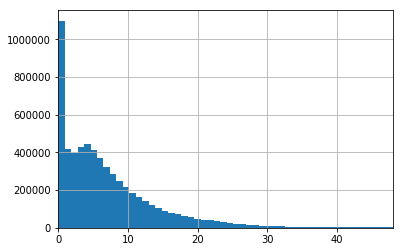

In [27]:
(df.time_lapse / (60*60)).hist(bins=800).set_xlim((0, 48));

#### Create New Features  
1) links to other subreddit  
2) domain name of linked urls  
3) no urls links  
4) no of subbreddit links  
5) word count  
6) senti_neg  
7) senti_pos  
8) senti_compound  
9) senti_neu  
10) subjectivity  
11) parent comment feautures  
12) word to vectors  
13) time elapsed  
14) unique words  
15) no of puntuations  
16) 
a) *authorkarma*


In [28]:
def pd_to_dict(df, index='', column=''):
    return pd.Series(df[column].values, index=df[index]).to_dict()

In [29]:
comment_to_parent_dict = pd_to_dict(df[['name', 'parent_id']],
                                    index='name', column='parent_id')

In [30]:
len(comment_to_parent_dict)

6195172

**I know there is much elagant way of doing this with recursion**

In [31]:
def get_depth(x):
    counter = 0
    temp = x
    while True:
        if temp[:3] == 't3_':
            return counter
        try:
            temp = comment_to_parent_dict[temp]
        except KeyError:
            return np.nan
        counter += 1

In [32]:
df['depth'] = df['name'].apply(get_depth)

In [33]:
df.tail().T

,6195167,6195168,6195169,6195170,6195171
created_utc,1433116778,1433116780,1433116781,1433116784,1433116785
ups,1,1,170,9,37
subreddit_id,t5_2qh13,t5_2qh13,t5_2qh13,t5_2qh13,t5_2qh13
link_id,t3_37z0mw,t3_37z0mw,t3_37zl5z,t3_380j06,t3_37z0mw
name,t1_crrbebf,t1_crrbecs,t1_crrbedn,t1_crrbefm,t1_crrbeft
score_hidden,0,0,0,0,0
author_flair_css_class,NaN,NaN,NaN,NaN,NaN
author_flair_text,None,None,None,None,None
subreddit,worldnews,worldnews,worldnews,worldnews,worldnews
removal_reason,None,None,None,None,None


**It would be a better vizualization with count in log scale**  

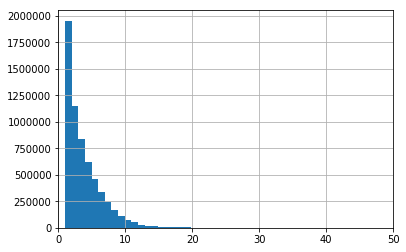

In [34]:
df.depth[df.depth < 200].hist(bins=200).set_xlim((0,50));

In [35]:
df.depth.describe()

count    6.133691e+06
mean     3.532311e+00
std      1.129264e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      1.291000e+03
Name: depth, dtype: float64

**Around 0.9 % of the data have broken links should we remove them ??**

In [36]:
df.depth.isna().sum() / float(df.shape[0])

0.009924018251632078

In [37]:
import re

Getting subreddit links from comments

In [38]:
df['linked_sr'] = df.body.apply(lambda x: re.findall(r"/r/([^\s/]+)", x))

Removing the subbreddit links from comments

In [39]:
df['body'] = df.body.apply(lambda x: re.sub(r"(/r/[^\s/]+)", '', x))

In [40]:
from urllib.parse import urlparse

In [41]:
url_regex = r'''(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
# url_regex = re.compile(url_regex)

In [42]:
# very slow
def get_domains_new(x):

    def _domain(y):
        try:
            return urlparse(y).netloc.split('.')[-2]
        except:
            return ''

    x = x.replace(' = ', '=')
    x = x.replace(' : ', ':')
    x = x.replace(' / ', '?')
    # urls = url_regex.findall(x)
    urls = re.findall(url_regex, x)
    urls = [url[0] for url in urls]
    urls = [url if url.startswith('http') else 'http://' + url for url in urls]
    domain_names = [_domain(url) for url in urls]
    domain_names = [d for d in domain_names if len(d) > 2]
    return domain_names

In [43]:
url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

In [44]:
def get_domains(x):
    x = x.replace(' = ', '=')
    x = x.replace(' : ', ':')
    x = x.replace(' / ', '?')
    urls = re.findall(url_regex, x)
    try:
        domain_names = [urlparse(url).netloc.split('.')[-2] for url in urls]
    except:
        return []
    return domain_names

In [45]:
df['linked_urls'] = df.body.apply(lambda x: get_domains(x))

In [46]:
def remove_urls(x):
    x = x.replace(' = ', '=')
    x = x.replace(' : ', ':')
    x = x.replace(' / ', '?')
    return re.sub(url_regex, '', x)

In [47]:
remove_urls('do you think this works http://www.lol.com')

'do you think this works '

In [48]:
df['body'] = df.body.apply(lambda x: remove_urls(x))

In [49]:
df['no_of_linked_sr'] = df['linked_sr'].apply(lambda x: len(x))
df['no_of_linked_urls'] = df['linked_urls'].apply(lambda x: len(x))

In [50]:
all_linked_sr = []
for l in df.linked_sr.values:
    all_linked_sr += l
len(all_linked_sr)

172012

In [51]:
from collections import Counter

In [52]:
top_sr_links = Counter(all_linked_sr)
top_sr_links.most_common(20)

[('politics', 11207),
 ('leagueoflegends', 10675),
 ('funny', 8178),
 ('worldnews', 5257),
 ('anime', 4050),
 ('explainlikeimfive', 4034),
 ('sex', 3539),
 ('leagueoflegends)', 3087),
 ('worldnews)', 2801),
 ('Politics.', 2569),
 ('politics&amp;subject=Question', 2561),
 ('worldnews.', 2507),
 ('help', 2393),
 ('worldnews](http:', 2387),
 ('sufficiencybot', 2382),
 ('sex)', 2309),
 ('gameofthrones', 2257),
 ('AutoModerator', 2132),
 ('mylittlepony', 2061),
 ('circlejerk)', 1871)]

In [53]:
all_linked_urls = []
for l in df.linked_urls.values:
    all_linked_urls += l
len(all_linked_urls)

482277

In [54]:
top_url_links = Counter(all_linked_urls)
top_url_links.most_common(20)

[('reddit', 87238),
 ('imgur', 59161),
 ('youtube', 55144),
 ('wikipedia', 38564),
 ('youtu', 14224),
 ('op', 8364),
 ('myanimelist', 7005),
 ('twitter', 6892),
 ('github', 5829),
 ('co', 4682),
 ('google', 3412),
 ('tumblr', 3323),
 ('wikia', 3136),
 ('imdb', 3097),
 ('wordpress', 2619),
 ('redditblog', 2420),
 ('amazon', 2086),
 ('nocookie', 2015),
 ('nytimes', 1960),
 ('wikimedia', 1839)]

In [55]:
allowed_urls = [i[0] for i in top_url_links.most_common(20)]

In [56]:
def remove_urls(x):
    y = []
    for i in x:
        if i in allowed_urls:
            y += [i]
    return y

In [57]:
df['a_linked_urls'] = df['linked_urls'].apply(lambda x: remove_urls(x))

In [58]:
df['subjectivity'] = df['body'].str.count('i ')

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
analyser = SentimentIntensityAnalyzer()

In [22]:
df.to_pickle('Data/working_data.pkl')

In [21]:
df = pd.read_pickle('Data/working_data.pkl')

In [22]:
# from swifter import swifter, DataFrameAccessor

In [6]:
def get_sentiment(x):
#     senti = analyser.polarity_scores(x['body'])
#     x['senti_neg'] = senti['neg']
#     x['senti_neu'] = senti['neu']
#     x['senti_pos'] = senti['pos']
#     x['senti_compound'] = senti['compound']
    return analyser.polarity_scores(x)

In [7]:
from multiprocessing import Pool

In [8]:
import numpy as np

In [9]:
num_partitions = 100
num_cores = 6

In [16]:
def parallelize_dataframe(df, func):
    df_split = np.array_split(df, num_partitions)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [15]:
def wrapper_get_sentiment(df):
    df['sentiment'] = df['body'].apply(get_sentiment)
    return df

In [1]:
sentiment = parallelize_dataframe(df['body'].to_frame(), wrapper_get_sentiment)

In [ ]:
df.to_pickle('Data/working_data2.pkl')

In [29]:
# df['body'].swifter.apply(func=get_sentiment)


Pandas Apply:   0%|          | 13457/6195172 [00:20<57:45, 1783.58it/s]  

In [27]:
# df['sentiment'] = df['body'].apply(func=get_sentiment, axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer